In [1]:
# Importación de todas lsa librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carga de datos

df = pd.read_csv("..\Datasets\complete_with_placas.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75475 entries, 0 to 75474
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   75475 non-null  object 
 1   tpep_dropoff_datetime  75475 non-null  object 
 2   passenger_count        75475 non-null  float64
 3   trip_distance          75475 non-null  float64
 4   RatecodeID             75475 non-null  float64
 5   PULocationID           75475 non-null  object 
 6   DOLocationID           75475 non-null  int64  
 7   payment_type           75475 non-null  int64  
 8   fare_amount            75475 non-null  float64
 9   total_amount           75475 non-null  float64
 10  LocationID             75475 non-null  int64  
 11  Borough                73235 non-null  object 
 12  Zone                   75330 non-null  object 
 13  service_zone           73090 non-null  object 
 14  placa                  75475 non-null  object 
dtypes:

In [4]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,LocationID,Borough,Zone,service_zone,placa
0,2024-06-01 00:34:43,2024-06-01 00:44:45,3.0,4.89,1.0,la guardia,192,2,19.8,29.05,192,Queens,Queensboro Hill,Boro Zone,lkj_6201
1,2024-06-01 00:17:58,2024-06-01 00:46:05,2.0,11.10,1.0,la guardia,230,3,47.8,66.49,230,Manhattan,Times Sq/Theatre District,Yellow Zone,psl_4822
2,2024-06-01 00:58:15,2024-06-01 01:39:37,2.0,17.13,2.0,jfk,48,1,70.0,98.88,48,Manhattan,Clinton East,Yellow Zone,ckh_4524
3,2024-06-01 00:05:17,2024-06-01 00:57:22,2.0,18.18,2.0,jfk,100,1,70.0,92.69,100,Manhattan,Garment District,Yellow Zone,tws_2211
4,2024-06-01 00:10:00,2024-06-01 00:35:56,2.0,9.45,1.0,la guardia,100,1,41.5,74.80,100,Manhattan,Garment District,Yellow Zone,plq_2120


In [22]:
df['Zone'].unique()

array(['Queensboro Hill', 'Times Sq/Theatre District', 'Clinton East',
       'Garment District', 'Canarsie', 'Hudson Sq',
       'Upper East Side North', 'Astoria', 'JFK Airport', 'Howard Beach',
       'Midtown Center', 'Yorkville West', 'Jackson Heights',
       'Financial District North', 'Midtown South', 'East Chelsea',
       'Maspeth', 'Greenwich Village South',
       'East Concourse/Concourse Village', 'Baisley Park',
       'Flatbush/Ditmas Park', 'Upper West Side South',
       'Sutton Place/Turtle Bay North', 'Forest Hills', 'Midtown East',
       'Williamsburg (North Side)', 'Meatpacking/West Village West',
       'Midtown North', 'Elmhurst', 'Schuylerville/Edgewater Park',
       'Central Harlem North', 'Gramercy', 'East Village',
       'Lenox Hill West', 'Hamilton Heights', 'Lincoln Square East',
       'Upper West Side North', 'East Elmhurst', 'UN/Turtle Bay South',
       'Bushwick South', 'Roosevelt Island', 'Murray Hill',
       'Murray Hill-Queens', 'Lower East Sid

In [5]:
print(df.isnull().sum())

tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
total_amount                0
LocationID                  0
Borough                  2240
Zone                      145
service_zone             2385
placa                       0
dtype: int64


In [6]:
# Eliminar los valores nulos 
df = df.dropna()

In [7]:
print(df.duplicated().sum())

14


In [8]:
# Eliminar los valores duplicados 
df = df.drop_duplicates()

In [9]:
# Convertir los datos de tiempo a su formato correcto
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

Relación entre la distancia del viaje y la tarifa

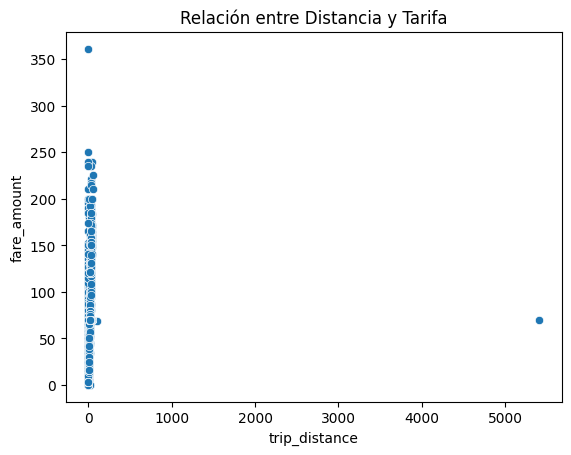

In [10]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title('Relación entre Distancia y Tarifa')
plt.show()


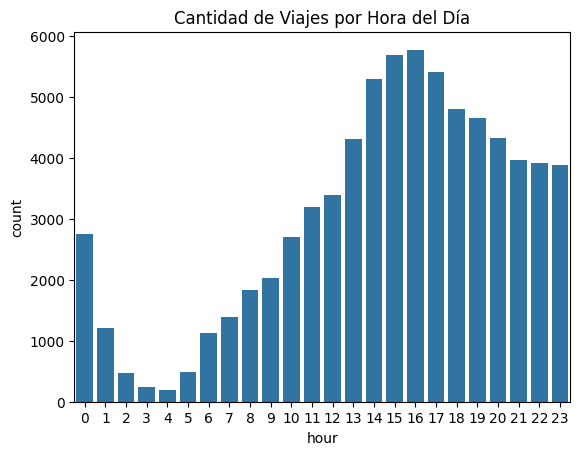

In [11]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
sns.countplot(x='hour', data=df)
plt.title('Cantidad de Viajes por Hora del Día')
plt.show()


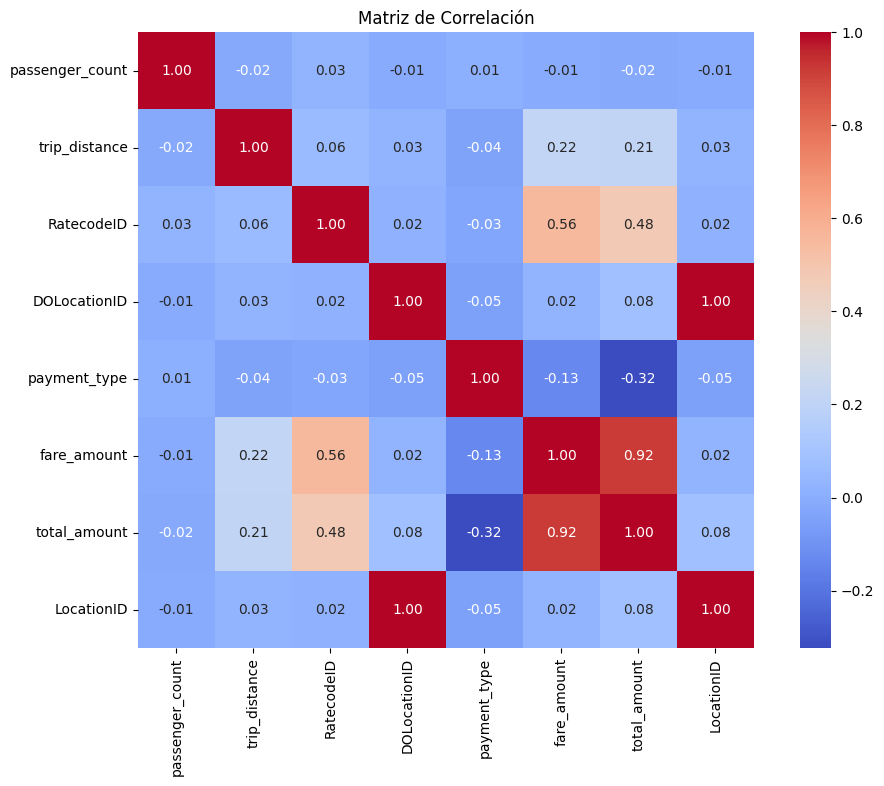

In [12]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()


In [13]:
# Calcular la duración del viaje en minutos
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


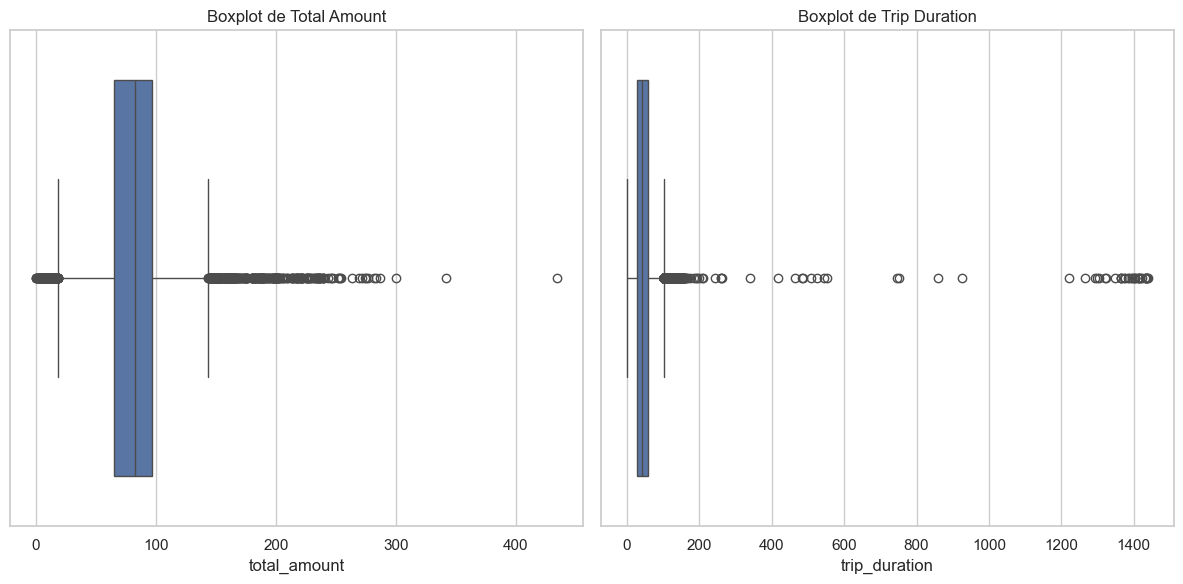

In [14]:


# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplot para 'total_amount'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot de Total Amount')

# Crear boxplot para 'trip_duration'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot de Trip Duration')

plt.tight_layout()
plt.show()


In [15]:
def imputar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Calcular la mediana
    mediana = df[columna].median()

    # Imputar outliers
    df[columna] = df[columna].where((df[columna] >= limite_inferior) & (df[columna] <= limite_superior), mediana)
    
    return df

# Aplicar la función a ambas columnas
df = imputar_outliers(df, 'total_amount')
df = imputar_outliers(df, 'trip_duration')


In [16]:
# Convertir la columna 'placa' en variables dummy
X = pd.get_dummies(df[['passenger_count', 'DOLocationID', 'placa']], drop_first=True)
y_costo = df['total_amount']  # Costo del viaje
y_tiempo = df['trip_duration']  # Tiempo de viaje en minutos

In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_costo, y_test_costo = train_test_split(X, y_costo, test_size=0.2, random_state=42)
X_train_tiempo, X_test_tiempo, y_train_tiempo, y_test_tiempo = train_test_split(X, y_tiempo, test_size=0.2, random_state=42)

# Entrenar los modelos
modelo_costo = LinearRegression().fit(X_train, y_train_costo)
modelo_tiempo = LinearRegression().fit(X_train_tiempo, y_train_tiempo)

In [18]:
# Realizar predicciones
y_pred_costo = modelo_costo.predict(X_test)
y_pred_tiempo = modelo_tiempo.predict(X_test_tiempo)

# Evaluar el modelo de costo
mse_costo = mean_squared_error(y_test_costo, y_pred_costo)
r2_costo = r2_score(y_test_costo, y_pred_costo)

# Evaluar el modelo de tiempo
mse_tiempo = mean_squared_error(y_test_tiempo, y_pred_tiempo)
r2_tiempo = r2_score(y_test_tiempo, y_pred_tiempo)

# Mostrar resultados
print("Resultados del modelo de Costo:")
print(f"Error Cuadrático Medio (MSE): {mse_costo:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_costo:.2f}")

print("\nResultados del modelo de Tiempo:")
print(f"Error Cuadrático Medio (MSE): {mse_tiempo:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_tiempo:.2f}")


Resultados del modelo de Costo:
Error Cuadrático Medio (MSE): 463.76
Coeficiente de Determinación (R^2): 0.01

Resultados del modelo de Tiempo:
Error Cuadrático Medio (MSE): 436.35
Coeficiente de Determinación (R^2): 0.01


In [19]:
from sklearn.tree import DecisionTreeRegressor

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_costo, y_test_costo = train_test_split(X, y_costo, test_size=0.2, random_state=42)
X_train_tiempo, X_test_tiempo, y_train_tiempo, y_test_tiempo = train_test_split(X, y_tiempo, test_size=0.2, random_state=42)

# Entrenar los modelos usando árboles de decisión
modelo_costo = DecisionTreeRegressor(random_state=42).fit(X_train, y_train_costo)
modelo_tiempo = DecisionTreeRegressor(random_state=42).fit(X_train_tiempo, y_train_tiempo)

# Hacer predicciones
predicciones_costo = modelo_costo.predict(X_test)
predicciones_tiempo = modelo_tiempo.predict(X_test_tiempo)

# Evaluar los modelos
mse_costo = mean_squared_error(y_test_costo, predicciones_costo)
r2_costo = r2_score(y_test_costo, predicciones_costo)

mse_tiempo = mean_squared_error(y_test_tiempo, predicciones_tiempo)
r2_tiempo = r2_score(y_test_tiempo, predicciones_tiempo)

# Imprimir resultados
print("Resultados del modelo de Costo:")
print(f"Error Cuadrático Medio (MSE): {mse_costo}")
print(f"Coeficiente de Determinación (R^2): {r2_costo}")

print("\nResultados del modelo de Tiempo:")
print(f"Error Cuadrático Medio (MSE): {mse_tiempo}")
print(f"Coeficiente de Determinación (R^2): {r2_tiempo}")


Resultados del modelo de Costo:
Error Cuadrático Medio (MSE): 332.5845019706488
Coeficiente de Determinación (R^2): 0.29008332728466757

Resultados del modelo de Tiempo:
Error Cuadrático Medio (MSE): 367.45006755370235
Coeficiente de Determinación (R^2): 0.16272823379107015


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_costo, y_test_costo = train_test_split(X, y_costo, test_size=0.2, random_state=42)
X_train_tiempo, X_test_tiempo, y_train_tiempo, y_test_tiempo = train_test_split(X, y_tiempo, test_size=0.2, random_state=42)

# Entrenar los modelos usando Random Forest
modelo_costo = RandomForestRegressor(random_state=42).fit(X_train, y_train_costo)
modelo_tiempo = RandomForestRegressor(random_state=42).fit(X_train_tiempo, y_train_tiempo)

# Hacer predicciones
predicciones_costo = modelo_costo.predict(X_test)
predicciones_tiempo = modelo_tiempo.predict(X_test_tiempo)

# Evaluar los modelos
mse_costo = mean_squared_error(y_test_costo, predicciones_costo)
r2_costo = r2_score(y_test_costo, predicciones_costo)

mse_tiempo = mean_squared_error(y_test_tiempo, predicciones_tiempo)
r2_tiempo = r2_score(y_test_tiempo, predicciones_tiempo)

# Imprimir resultados
print("Resultados del modelo de Costo:")
print(f"Error Cuadrático Medio (MSE): {mse_costo}")
print(f"Coeficiente de Determinación (R^2): {r2_costo}")

print("\nResultados del modelo de Tiempo:")
print(f"Error Cuadrático Medio (MSE): {mse_tiempo}")
print(f"Coeficiente de Determinación (R^2): {r2_tiempo}")


Resultados del modelo de Costo:
Error Cuadrático Medio (MSE): 285.64465851209275
Coeficiente de Determinación (R^2): 0.39027854771264026

Resultados del modelo de Tiempo:
Error Cuadrático Medio (MSE): 323.47586132913335
Coeficiente de Determinación (R^2): 0.26292786515431554
